In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [26]:
### ARCHIVE ###
def define_quartzOLD(quartz_params, quartz_position):  ##### SETS UP THE QUARTZ RADIATOR WITH THE SPECIFIED POSITION USED AS THE CENTRE OF THE SHAPE
    quartz_depth, quartz_height, quartz_width = quartz_params
    qax, qay, qaz = quartz_position
    # Plot Quartz Radiator
    Z  = np.array([[qax-quartz_depth, qay-quartz_width, qaz-quartz_height],
                    [qax-quartz_depth, qay-quartz_width, qaz+quartz_height],
                    [qax-quartz_depth, qay+quartz_width, qaz+quartz_height],
                    [qax-quartz_depth, qay+quartz_width, qaz-quartz_height],
                    [qax+quartz_depth, qay-quartz_width, qaz-quartz_height],
                    [qax+quartz_depth, qay-quartz_width, qaz+quartz_height],
                    [qax+quartz_depth, qay+quartz_width, qaz+quartz_height],
                    [qax+quartz_depth, qay+quartz_width, qaz-quartz_height]])
    
    verts = [[Z[0],Z[1],Z[2],Z[3]],
            [Z[4],Z[5],Z[6],Z[7]],
            [Z[0],Z[1],Z[5],Z[4]],
            [Z[2],Z[3],Z[7],Z[6]],
            [Z[1],Z[2],Z[6],Z[5]],
            [Z[4],Z[7],Z[3],Z[0]]]

    return verts

def define_quartz2(quartz_params, quartz_position):      ##### SETS UP THE QUARTZ RADIATOR WITH THE SPECIFIED POSITION USED AS THE BOTTOM LEFT CORNE OF SHAPE
    quartz_depth, quartz_height, quartz_width = quartz_params
    qax, qay, qaz = quartz_position
    
    # Define vertices
    Z = np.array([
        [qax, qay, qaz],
        [qax, qay, qaz + quartz_height],
        [qax, qay + quartz_width, qaz + quartz_height],
        [qax, qay + quartz_width, qaz],
        [qax + quartz_depth, qay, qaz],
        [qax + quartz_depth, qay, qaz + quartz_height],
        [qax + quartz_depth, qay + quartz_width, qaz + quartz_height],
        [qax + quartz_depth, qay + quartz_width, qaz]
    ])
    
    verts = [
        [Z[0], Z[1], Z[2], Z[3]],
        [Z[4], Z[5], Z[6], Z[7]],
        [Z[0], Z[1], Z[5], Z[4]],
        [Z[2], Z[3], Z[7], Z[6]],
        [Z[1], Z[2], Z[6], Z[5]],
        [Z[4], Z[7], Z[3], Z[0]]
    ]

    return verts


In [27]:
# Visualisation functions
def define_quartz(quartz_params, quartz_position):    ##### SETS UP THE QUARTZ RADIATOR WITH THE SPECIFIED POSITION USED AS THE CENTRE OF THE FRONT FACE
    quartz_depth, quartz_height, quartz_width = quartz_params
    qax, qay, qaz = quartz_position
    
    half_quartz_width = quartz_width / 2
    half_quartz_height = quartz_height / 2
    
    # Define vertices with symmetry on y and z dimensions
    Z = np.array([
        [qax, qay - half_quartz_width, qaz - half_quartz_height],
        [qax, qay - half_quartz_width, qaz + half_quartz_height],
        [qax, qay + half_quartz_width, qaz + half_quartz_height],
        [qax, qay + half_quartz_width, qaz - half_quartz_height],
        [qax + quartz_depth, qay - half_quartz_width, qaz - half_quartz_height],
        [qax + quartz_depth, qay - half_quartz_width, qaz + half_quartz_height],
        [qax + quartz_depth, qay + half_quartz_width, qaz + half_quartz_height],
        [qax + quartz_depth, qay + half_quartz_width, qaz - half_quartz_height]
    ])
    
    verts = [
        [Z[0], Z[1], Z[2], Z[3]],
        [Z[4], Z[5], Z[6], Z[7]],
        [Z[0], Z[1], Z[5], Z[4]],
        [Z[2], Z[3], Z[7], Z[6]],
        [Z[1], Z[2], Z[6], Z[5]],
        [Z[4], Z[7], Z[3], Z[0]]
    ]

    return verts

def visulise_tracks(tracks_list, quartz_position, quartz_params):
    quartz_depth, quartz_height, quartz_width = quartz_params
    qax, qay, qaz = quartz_position
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create Quartz Radiator
    verts = define_quartz(quartz_params, quartz_position)
    ax.add_collection3d(Poly3DCollection(verts, facecolors='cyan', linewidths=1, edgecolors='r', alpha=.20))
    
    # Plot tracks
    for track in tracks_list:
        track_id, init_vertex, quartz_in_vtx, quartz_out_vtx = track.get_track_data()
        # stack vertices vectors together into one array 
        vertices = np.vstack((init_vertex, quartz_in_vtx, quartz_out_vtx))
        # plot track
        ax.plot(vertices[:, 0], vertices[:, 1], vertices[:, 2], label=f"Track {track_id}")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(0, qax + (quartz_depth*3))
    ax.set_ylim(-(quartz_width*1.4), qay + (quartz_width*1.4))
    ax.set_zlim(qaz-quartz_height, qaz+quartz_height)
    plt.legend()
    plt.show()

def visulise_quartz(tracks_list, cherenkov_track_list, quartz_position, quartz_params):        
    quartz_depth, quartz_height, quartz_width = quartz_params
    qax, qay, qaz = quartz_position
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create Quartz Radiator
    verts = define_quartz(quartz_params, quartz_position)
    ax.add_collection3d(Poly3DCollection(verts, facecolors='cyan', linewidths=1, edgecolors='r', alpha=.20))
    
    # Plot tracks
    for track in tracks_list:
        if track.track_hit_radiator:
            track_id, init_vertex, quartz_in_vtx, quartz_out_vtx = track.get_track_data()
            # mark impacts
            ax.scatter(quartz_in_vtx[0], quartz_in_vtx[1], quartz_in_vtx[2], c='r', marker='o', s=1, alpha=0.5)
            ax.scatter(quartz_out_vtx[0], quartz_out_vtx[1], quartz_out_vtx[2], c='r', marker='o', s=1, alpha=0.5)
            # plot track
            vertices = np.vstack((init_vertex, quartz_in_vtx, quartz_out_vtx))
            ax.plot(vertices[:, 0], vertices[:, 1], vertices[:, 2], c='b', alpha=0.4, label=f"Track {track_id}")
        
    # plot cherenkov photon tracks
    for cherenkov_track in cherenkov_track_list:
        track_id, daughter_id, reflection_vertex_list = cherenkov_track.get_track_data()

        reflection_vertex_list = np.array(reflection_vertex_list)
        radiator_exit_vertex = reflection_vertex_list[-1]
        radiator_exit_direction_vector = cherenkov_track.radiator_exit_direction_vector
        # plot track
        ax.plot(reflection_vertex_list[:, 0], reflection_vertex_list[:, 1], reflection_vertex_list[:, 2], c='g', alpha=0.4, label=f"Daghter {daughter_id} of Track {track_id}")

        # plot a short line that extends from the radiator exit vertex in the direction of the radiator exit direction vector
        ax.plot([radiator_exit_vertex[0], radiator_exit_vertex[0] + (radiator_exit_direction_vector[0]*quartz_depth)/2],
                [radiator_exit_vertex[1], radiator_exit_vertex[1] + (radiator_exit_direction_vector[1]*quartz_height)/2],
                [radiator_exit_vertex[2], radiator_exit_vertex[2] + (radiator_exit_direction_vector[2]*quartz_width)/2], c='g', alpha=0.9)
        

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')    
    ax.set_xlim(qax - (quartz_depth*2), qax + (quartz_depth*3))
    ax.set_ylim(qay-(quartz_width*1.4), qay + (quartz_width*1.4))
    ax.set_zlim(qaz-quartz_height, qaz+quartz_height)

    plt.show()


### Particle tracks
class ParticleTrack:
    def __init__(self, track_id, energy, init_vertex, init_dir_vector, quartz_position, quartz_params, particle_type):
        self.track_id = track_id  # Unique identifier for the track
        self.particle_type = particle_type  # Type of particle (e.g., electron, proton, etc.)
        self.energy = energy  # Energy of the particle track
        self.init_vertex = np.array(init_vertex)  # Starting position of the particle track (x, y, z)
        self.init_dir_vector = np.array(init_dir_vector)  # Ending position of the particle track (x, y, z)
        self.distance_to_quartz = quartz_position[0] # Quartz front face straight line distance from 0, 0, 0
        self.quartz_depth = quartz_params[0] # Quartz depth
        self.quartz_height = quartz_params[1] # Quartz height
        self.quartz_width = quartz_params[2] # Quartz width
        self.propegate_track()

    def propegate_track(self):
        # Propagate the particle track through the detector by taking star6ting position and direction vector and then finding intersection with detector quartz

        # Normalise dir vector
        norm_dir_vector = self.init_dir_vector / np.linalg.norm(self.init_dir_vector)

        # using trig find the coordinate on the detector face which is a plane that lies at (distance_to_quartz, 0, 0) from the start point of init_vertex following the direction of norm_dir_vector
        x = self.distance_to_quartz
        y = x * norm_dir_vector[1] / norm_dir_vector[0]
        z = x * norm_dir_vector[2] / norm_dir_vector[0]

        # calculate length of track befor hitting detector face
        length = np.sqrt(x**2 + y**2 + z**2)
        
        # check if track hits detector face
        if y < self.quartz_width/2 and y > -self.quartz_width/2 and z < self.quartz_height/2 and z > -self.quartz_height/2:
            self.quartz_in_vtx = np.array((x, y, z))
            self.tracklength = length

            # using trig find the coordinate on the detector face which is a plane that lies at (distance_to_quartz, 0, 0) from the start point of init_vertex following the direction of norm_dir_vector
            x = self.distance_to_quartz + self.quartz_depth
            y = x * norm_dir_vector[1] / norm_dir_vector[0]
            z = x * norm_dir_vector[2] / norm_dir_vector[0]
            self.quartz_out_vtx = np.array((x, y, z))

            # calculate length of track inside quartz radiator
            length2 = np.sqrt(x**2 + y**2 + z**2)
            self.radiator_path_length = length2 - length
            self.track_hit_radiator = True
        
        else:
            self.quartz_in_vtx = np.array((x, y, z))
            self.quartz_out_vtx = np.array((np.nan, np.nan, np.nan))
            self.tracklength = np.nan
            self.radiator_path_length = np.nan
            self.track_hit_radiator = False

    def radiate_cherenkov(self, number_of_photons):
        # Create cherenkov photons from the particle track
        #select number_of_photons random points along the track from self.quartz_in_vtx to self.quartz_out_vtx which are 3d vectors

        # Create cherenkov photons from the particle track
        cherenkov_photons_origin_vertex_list = []

        for _ in range(number_of_photons):
            # Generate a random interpolation parameter between 0 and 1
            t = np.random.random()

            # Calculate the random point along the track
            random_point = self.quartz_in_vtx + t * (self.quartz_out_vtx - self.quartz_in_vtx)

            # Append the random point to the list of cherenkov photons
            cherenkov_photons_origin_vertex_list.append(random_point)

        return cherenkov_photons_origin_vertex_list

    def get_track_data(self):
        return self.track_id, self.init_vertex, self.quartz_in_vtx, self.quartz_out_vtx
    
    def print_info(self):
        # Print information about the particle track
        print(f"Track ID: {self.track_id}")
        print(f"Particle Type: {self.particle_type}")
        print(f"Energy: {self.energy} MeV")
        print(f"Initial Vertex: {self.init_vertex}")
        print(f"Initial Direction Vector: {self.init_dir_vector}")
        print(f"Distance to Quartz: {self.distance_to_quartz} m")
        print(f"Quartz Depth: {self.quartz_depth} m")
        print(f"Track Length: {self.tracklength} m")
        print(f"Track Length in Quartz: {self.radiator_path_length} m")
        print(f"Quartz Near Side Intersection Vertex: {self.quartz_in_vtx}")
        print(f"Quartz Far Side Intersection Vertex: {self.quartz_out_vtx}")
        print("\n")

### Cherenkov photons
class cherenkov_photon():
    def __init__(self, track_id, daughter_track_id, energy, init_vertex, quartz_params, quartz_position):
        self.track_id = track_id  # Unique identifier for the mother particle track
        self.daughter_track_id = daughter_track_id  # Unique identifier for the cherenkov photon track
        self.particle_type = "photon"  # Type of particle (e.g., electron, proton, etc.)
        self.energy = energy  # Energy of the photon
        self.init_vertex = init_vertex  # Starting position of the particle track (x, y, z)
        # genrate random normalised direction vetors from a uniform distribution
        init_dir_vector = np.random.uniform(size=3)
        self.init_dir_vector = init_dir_vector / np.linalg.norm(init_dir_vector) 
        self.quartz_params = quartz_params
        self.quartz_position = quartz_position       
        self.propegate_photon(init_vertex, init_dir_vector, quartz_params, quartz_position)
    
    def print_info(self):
        print(f"Track ID: {self.track_id}")
        print(f"Daughter Track ID: {self.daughter_track_id}")
        print(f"Particle Type: {self.particle_type}")
        print(f"Energy: {self.energy} MeV")
        print(f"Initial Vertex: {self.init_vertex}")
        print(f"Initial Direction Vector: {self.init_dir_vector}")
        print(f"Surface Intersections: {self.surface_intersections_list}")
        print(f"Radiator Exit Vertex: {self.radiator_exit_vertex}")
        print(f"Radiator Exit Direction Vector: {self.radiator_exit_direction_vector}")
        print(f"Radiator Path Length: {self.radiator_path_length}")
        print("\n")

    def find_intersection_3dOLD(self, direction_vector, initial_point, quartz_params, quartz_position):
        quartz_depth, quartz_height, quartz_width = quartz_params
        qax, qay, qaz = quartz_position
        x_dir, y_dir, z_dir = direction_vector
        x_0, y_0, z_0 = initial_point

        # Define the boundaries of the box
        x_min = qax - quartz_depth
        x_max = qax + quartz_depth
        y_min = qay - quartz_width
        y_max = qay + quartz_width
        z_min = qaz - quartz_height
        z_max = qaz + quartz_height


        # Solve for t when the direction vector intersects with box's x boundaries
        t_x_min = (x_min - x_0) / x_dir
        t_x_max = (x_max - x_0) / x_dir
        
        # Solve for corresponding y and z values at t_x_min and t_x_max
        y_x_min = y_0 + y_dir * t_x_min
        z_x_min = z_0 + z_dir * t_x_min
        y_x_max = y_0 + y_dir * t_x_max
        z_x_max = z_0 + z_dir * t_x_max
        
        # Check if y and z values are within box's y and z boundaries
        if y_min <= y_x_min <= y_max and z_min <= z_x_min <= z_max:
            return (x_min, y_x_min, z_x_min)
        elif y_min <= y_x_max <= y_max and z_min <= z_x_max <= z_max:
            return (x_max, y_x_max, z_x_max)
        

        # Solve for t when the direction vector intersects with box's y boundaries
        t_y_min = (y_min - y_0) / y_dir
        t_y_max = (y_max - y_0) / y_dir
        
        # Solve for corresponding x and z values at t_y_min and t_y_max
        x_y_min = x_0 + x_dir * t_y_min
        z_y_min = z_0 + z_dir * t_y_min
        x_y_max = x_0 + x_dir * t_y_max
        z_y_max = z_0 + z_dir * t_y_max
        
        # Check if x and z values are within box's x and z boundaries
        if x_min <= x_y_min <= x_max and z_min <= z_y_min <= z_max:
            return (x_y_min, y_min, z_y_min)
        elif x_min <= x_y_max <= x_max and z_min <= z_y_max <= z_max:
            return (x_y_max, y_max, z_y_max)
        
        # Solve for t when the direction vector intersects with box's z boundaries
        t_z_min = (z_min - z_0) / z_dir
        t_z_max = (z_max - z_0) / z_dir
        
        # Solve for corresponding x and y values at t_z_min and t_z_max
        x_z_min = x_0 + x_dir * t_z_min
        y_z_min = y_0 + y_dir * t_z_min
        x_z_max = x_0 + x_dir * t_z_max
        y_z_max = y_0 + y_dir * t_z_max
        
        # Check if x and y values are within box's x and y boundaries
        if x_min <= x_z_min <= x_max and y_min <= y_z_min <= y_max:
            return (x_z_min, y_z_min, z_min)
        elif x_min <= x_z_max <= x_max and y_min <= y_z_max <= y_max:
            return (x_z_max, y_z_max, z_max)
        


        return None

    def find_intersection_3d(self, direction_vector, initial_point, quartz_params, quartz_position, tolerance=1e-6):
        import math

        x_dir, y_dir, z_dir = direction_vector
        x_0, y_0, z_0 = initial_point
        qax, qay, qaz = quartz_position
        quartz_depth, quartz_width, quartz_height = quartz_params
        
        # Ensure non-zero direction vector components and vector length
        if math.isclose(x_dir, 0.0, rel_tol=tolerance) and math.isclose(y_dir, 0.0, rel_tol=tolerance) and math.isclose(z_dir, 0.0, rel_tol=tolerance):
            raise ValueError("Direction vector has zero length")
        
        # Define the boundaries of the box
        x_min = qax - quartz_depth
        x_max = qax + quartz_depth
        y_min = qay - quartz_width
        y_max = qay + quartz_width
        z_min = qaz - quartz_height
        z_max = qaz + quartz_height
        
        # Solve for t when the direction vector intersects with box's x boundaries
        t_x_min = (x_min - x_0) / x_dir
        t_x_max = (x_max - x_0) / x_dir
        
        # Solve for corresponding y and z values at t_x_min and t_x_max
        y_x_min = y_0 + y_dir * t_x_min
        z_x_min = z_0 + z_dir * t_x_min
        y_x_max = y_0 + y_dir * t_x_max
        z_x_max = z_0 + z_dir * t_x_max
        
        # Check if y and z values are within box's y and z boundaries
        if y_min <= y_x_min <= y_max and z_min <= z_x_min <= z_max:
            return x_min, y_x_min, z_x_min
        elif y_min <= y_x_max <= y_max and z_min <= z_x_max <= z_max:
            return x_max, y_x_max, z_x_max
        
        # Solve for t when the direction vector intersects with box's y boundaries
        t_y_min = (y_min - y_0) / y_dir
        t_y_max = (y_max - y_0) / y_dir
        
        # Solve for corresponding x and z values at t_y_min and t_y_max
        x_y_min = x_0 + x_dir * t_y_min
        z_y_min = z_0 + z_dir * t_y_min
        x_y_max = x_0 + x_dir * t_y_max
        z_y_max = z_0 + z_dir * t_y_max
        
        # Check if x and z values are within box's x and z boundaries
        if x_min <= x_y_min <= x_max and z_min <= z_y_min <= z_max:
            return x_y_min, y_min, z_y_min
        elif x_min <= x_y_max <= x_max and z_min <= z_y_max <= z_max:
            return x_y_max, y_max, z_y_max
        
        # Solve for t when the direction vector intersects with box's z boundaries
        t_z_min = (z_min - z_0) / z_dir
        t_z_max = (z_max - z_0) / z_dir
        
        # Solve for corresponding x and y values at t_z_min and t_z_max
        x_z_min = x_0 + x_dir * t_z_min
        y_z_min = y_0 + y_dir * t_z_min
        x_z_max = x_0 + x_dir * t_z_max
        y_z_max = y_0 + y_dir * t_z_max
        
        # Check if x and y values are within box's x and y boundaries
        if x_min <= x_z_min <= x_max and y_min <= y_z_min <= y_max:
            return x_z_min, y_z_min, z_min
        elif x_min <= x_z_max <= x_max and y_min <= y_z_max <= y_max:
            return x_z_max, y_z_max, z_max
        
        print("No intersection found")
        return None

    def propegate_track(self):
        intersection_verticies = []
        #propegate track from init_vertex along init_dir_vector 
        # find intersection with quartz radiator
        intersection_verticies.append(self.find_intersection_3d(self.init_dir_vector, self.init_vertex, self.quartz_params, self.quartz_position))
        print(intersection_verticies)
        
    def get_track_data(self):
        return self.track_id, self.daughter_track_id, self.surface_intersections_list
    
    def propegate_photon(self, origin, direction_vector, quartz_params, quartz_position):
        quartz_depth, quartz_height, quartz_width = quartz_params
        qax, qay, qaz = quartz_position
        x_dim, y_dim, z_dim = quartz_depth, quartz_width, quartz_height
        position = np.array(origin, dtype=float)
        #position += np.array([qax, qay, qaz])  # Apply positional shift
        direction = np.array(direction_vector, dtype=float)
        data = [origin]
        while position[2] < (z_dim / 2) - qaz:  # Exit via top of reflector
            distances = np.array([
                (x_dim - (position[0] - qax)) / direction[0] if direction[0] > 0 else (position[0] - qax) / -direction[0],
                ((qay + y_dim / 2) - position[1]) / direction[1] if direction[1] > 0 else (position[1] - (qay - y_dim / 2)) / -direction[1],
                ((qaz + z_dim / 2) - position[2]) / direction[2] if direction[2] > 0 else (position[2] - (qaz - z_dim / 2)) / -direction[2]
            ])

            # Find the minimum positive distance and corresponding side
            min_distance = np.min(distances)
            min_distance_indices = np.where(np.isclose(distances, min_distance))[0]
            
            # Update position based on the minimum distance
            position = position + min_distance * direction
            data.append(position.copy())
            #print("Position:", position)
            
            # Reflect the direction vector based on the side hit
            for min_distance_index in min_distance_indices:
                if min_distance_index == 0:
                    direction[0] *= -1
                elif min_distance_index == 1:
                    direction[1] *= -1
                elif min_distance_index == 2:
                    direction[2] *= -1
                
        #return position dir_vec, radiator_path_data, radiator_path_length
        self.surface_intersections_list = data
        self.radiator_exit_vertex = position
        self.radiator_exit_direction_vector = direction

        # length is distance from across all the paths between intersections
        self.radiator_path_length = np.sum(np.linalg.norm(np.diff(data, axis=0), axis=1))

   





#Single torch module
quartz_params = (0.01, 2.5, 0.66) # depth, height, width all in meters
quartz_position = (2, 0, 0) # centre of front face




Track ID: 1
Particle Type: electron
Energy: 1.0 MeV
Initial Vertex: [0 0 0]
Initial Direction Vector: [ 1.   0.  -0.6]
Distance to Quartz: 2 m
Quartz Depth: 0.01 m
Track Length: 2.33238075793812 m
Track Length in Quartz: 0.011661903789690342 m
Quartz Near Side Intersection Vertex: [ 2.   0.  -1.2]
Quartz Far Side Intersection Vertex: [ 2.01   0.    -1.206]


Track ID: 2
Particle Type: muon
Energy: 13.0 MeV
Initial Vertex: [0 0 0]
Initial Direction Vector: [1.  0.2 0. ]
Distance to Quartz: 2 m
Quartz Depth: 0.01 m
Track Length: nan m
Track Length in Quartz: nan m
Quartz Near Side Intersection Vertex: [2.  0.4 0. ]
Quartz Far Side Intersection Vertex: [nan nan nan]




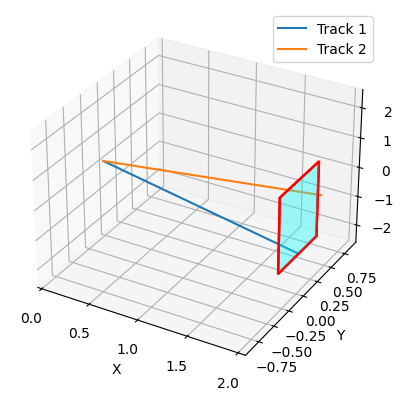

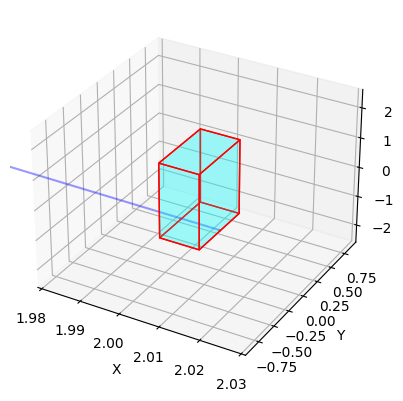

In [28]:

### Testing particle tracks
track_id = 1
init_vertex = (0, 0, 0)
init_dir_vector = (1, 0, -0.6)
energy = 1.0 # MeV

track1 = ParticleTrack(track_id, energy, init_vertex, init_dir_vector, quartz_position, quartz_params, particle_type="electron")
track1.print_info()

track_id = 2
init_vertex = (0, 0, 0)
init_dir_vector = (1, 0.2, 0)
energy = 13.0 # MeV

track2 = ParticleTrack(track_id, energy, init_vertex, init_dir_vector, quartz_position, quartz_params, particle_type="muon")
track2.print_info()




tracks_list = [track1, track2]
cherenkov_track_list = []
visulise_tracks(tracks_list, quartz_position, quartz_params)
visulise_quartz(tracks_list, cherenkov_track_list, quartz_position, quartz_params)




Track ID: 1
Daughter Track ID: 0
Particle Type: photon
Energy: 1 MeV
Initial Vertex: [ 2.00754925  0.         -1.20452955]
Initial Direction Vector: [0.18806438 0.97413477 0.12527264]
Surface Intersections: [array([ 2.00754925,  0.        , -1.20452955]), array([ 2.01      ,  0.01269436, -1.20289707]), array([ 2.        ,  0.0644923 , -1.19623592]), array([ 2.01      ,  0.11629024, -1.18957476]), array([ 2.        ,  0.16808818, -1.1829136 ]), array([ 2.01      ,  0.21988612, -1.17625244]), array([ 2.        ,  0.27168407, -1.16959129]), array([ 2.01      ,  0.32348201, -1.16293013]), array([ 2.00874165,  0.33      , -1.16209192]), array([ 2.        ,  0.28472005, -1.15626897]), array([ 2.01      ,  0.23292211, -1.14960781]), array([ 2.        ,  0.18112417, -1.14294666]), array([ 2.01      ,  0.12932622, -1.1362855 ]), array([ 2.        ,  0.07752828, -1.12962434]), array([ 2.01      ,  0.02573034, -1.12296318]), array([ 2.        , -0.0260676 , -1.11630203]), array([ 2.01      , -0.0

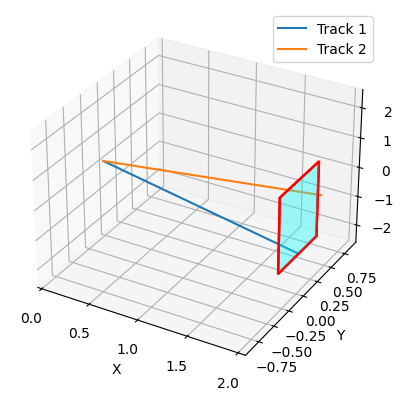

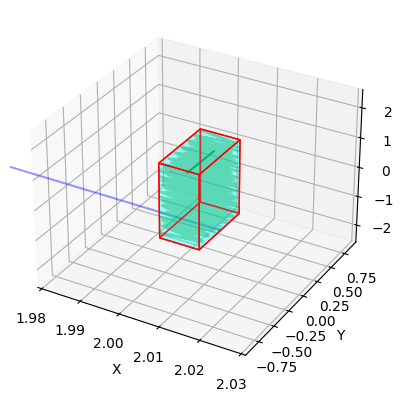

In [29]:
### Testing cherenkov photon class
n_cher_per_track = 1 # number of photons each particle produces, can be randomised or taken from a distribution or equation later but for now setting to constant
 
cherenkov_photons_list = []
for track in tracks_list:
    c_photon_v_list = track.radiate_cherenkov(n_cher_per_track)
    for dt_id, cherenkov_photon_vert in enumerate(c_photon_v_list):
        cherenkov_photons_list.append(cherenkov_photon(track.track_id, dt_id, 1, cherenkov_photon_vert, quartz_params, quartz_position))

for photon in cherenkov_photons_list[:2]:
    photon.print_info()

visulise_tracks(tracks_list, quartz_position, quartz_params)

visulise_quartz(tracks_list, cherenkov_photons_list, quartz_position, quartz_params)

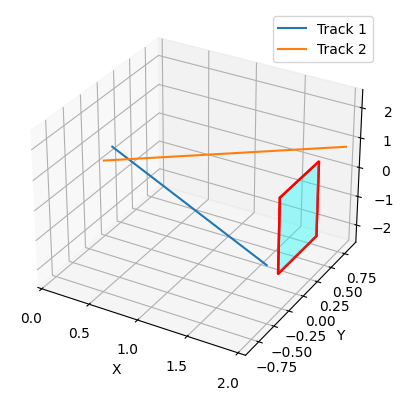

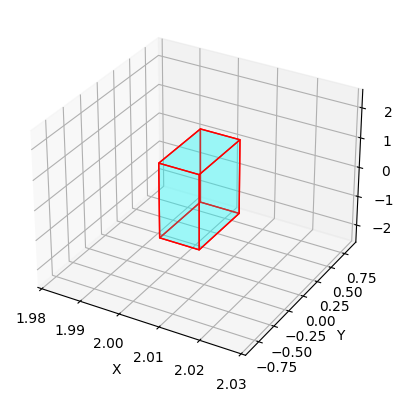

In [30]:
## Example of generating multiple tracks and photons
num_of_particles = 2
n_cher_per_track = 2

tracks_list = []
cherenkov_photons_list = []
radiator_exit_vertex_list = []
radiator_exit_direction_vector_list = []
for i in range (num_of_particles):
    track_id = i + 1
    init_vertex = (0, np.random.uniform(-0.5, 0.5), np.random.uniform(-0.5, 0.5))
    init_dir_vector = (1, np.random.uniform(-0.5, 0.5), np.random.uniform(-0.5, 0.5))
    distance_to_quartz = 2 # m
    quartz_depth = 0.01 # m
    energy = 13.0 # MeV
    genrated_track = ParticleTrack(track_id, energy, init_vertex, init_dir_vector, quartz_position, quartz_params, particle_type="muon")
    tracks_list.append(genrated_track)
    if genrated_track.track_hit_radiator:
        for dt_id, cherenkov_photon_vert in enumerate(genrated_track.radiate_cherenkov(n_cher_per_track)):
            photon = cherenkov_photon(track_id, dt_id+1, 1, cherenkov_photon_vert, quartz_params, quartz_position)
            cherenkov_photons_list.append(photon)
            radiator_exit_vertex_list.append(photon.radiator_exit_vertex)
            radiator_exit_direction_vector_list.append(photon.radiator_exit_direction_vector)

visulise_tracks(tracks_list, quartz_position, quartz_params)

visulise_quartz(tracks_list, cherenkov_photons_list, quartz_position, quartz_params)